# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [2]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [28]:
hist2 = {}
for x in t:
    hist2[x] = hist2.get(x, 0) + 1
    
print(hist2)
print(hist2.get(5))
sorted(hist2.values())

{1: 1, 2: 2, 3: 1, 5: 1}
1


[1, 1, 1, 2]

You can use a `Counter` (which is a dictionary with additional methods):

In [4]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [19]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [20]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [21]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [22]:
hist[4]

0

The `Values` method returns the values:

In [23]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [24]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [25]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

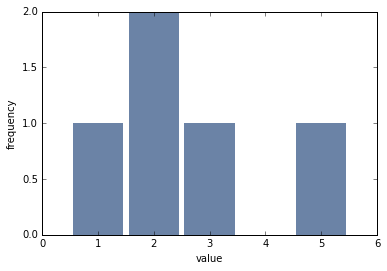

In [26]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

<Container object of 4 artists>

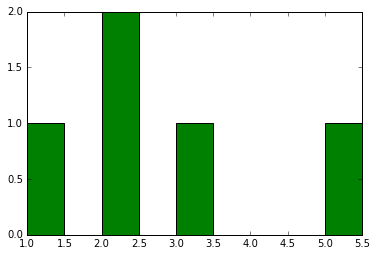

In [32]:
import matplotlib.pyplot as plt
plt.bar(hist2.keys(), hist2.values(), .5, color='g')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [33]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

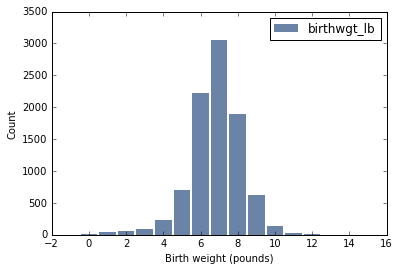

In [34]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [35]:
ages = np.floor(live.agepreg)

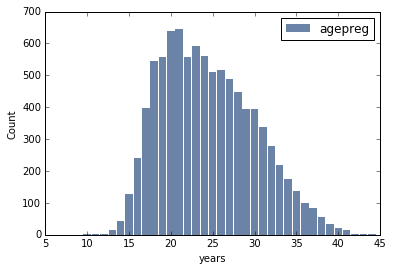

In [36]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

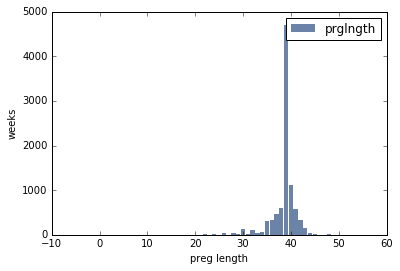

In [37]:
# Solution goes here
prglngth = live.prglngth
hist_prglngth = thinkstats2.Hist(prglngth, label='prglngth')
thinkplot.Hist(hist_prglngth)
thinkplot.Config(xlabel='preg length', ylabel='weeks')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [38]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


Use `Largest` to display the longest pregnancy lengths.

In [39]:
# Solution goes here
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

44.0 1
43.0 1
42.0 2
41.0 14
40.0 21
39.0 34
38.0 55
37.0 83
36.0 99
35.0 138


From live births, we can selection first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [41]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

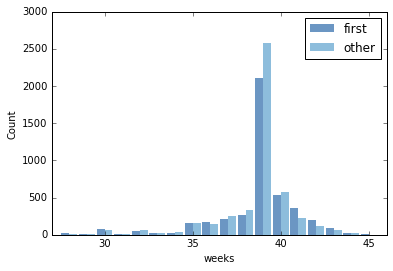

In [42]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [43]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [44]:
mean, std, var

(38.56055968517709, 2.702343810070587, 7.3026620678268168)

As an exercise, confirm that `std` is the square root of `var`:

In [47]:
# Solution goes here
assert(np.sqrt(var)==std)

Here's are the mean pregnancy lengths for first babies and others:

In [25]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [48]:
firsts.prglngth.mean() - others.prglngth.mean()

0.078037266777549519

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [49]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [51]:
# Solution goes here
ces = CohenEffectSize(firsts.prglngth, others.prglngth)
ces

0.028879044654449834

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [56]:
# Solution goes here
first = live[live.birthord==1]
others = live[live.birthord != 1]

first_mean = first.totalwgt_lb.mean()
others_mean = others.totalwgt_lb.mean()
#first babies are lighter
print(first_mean, others_mean)

7.20109443044 7.32585561497


In [57]:
# Solution goes here
ces = CohenEffectSize(first.totalwgt_lb, others.totalwgt_lb)
# The effect size is still relativelly small, but larger than the effect size for pregnancy length
ces

-0.088672927072601743

For the next few exercises, we'll load the respondent file:

In [58]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

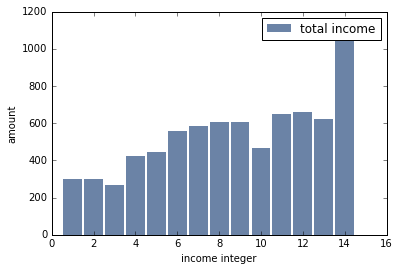

In [62]:
# Solution goes here
totincr = resp['totincr']

hist_totincr = thinkstats2.Hist(totincr, label='total income')
thinkplot.Hist(hist_totincr)
thinkplot.Config(xlabel='income integer', ylabel='amount')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

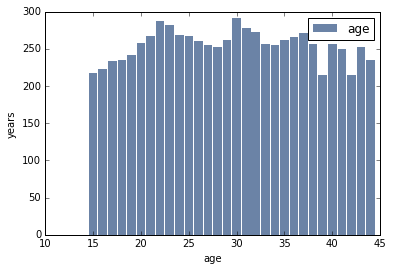

In [63]:
# Solution goes here
age_r = resp['age_r']

hist_age_r = thinkstats2.Hist(age_r, label='age')
thinkplot.Hist(hist_age_r)
thinkplot.Config(xlabel='age', ylabel='years')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

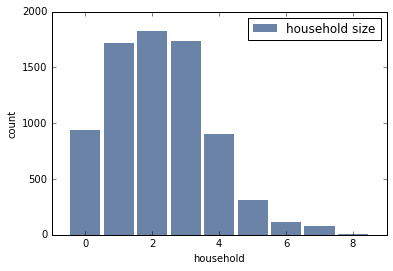

In [64]:
# Solution goes here
numfmhh = resp['numfmhh']

hist_numfmhh = thinkstats2.Hist(numfmhh, label='household size')
thinkplot.Hist(hist_numfmhh)
thinkplot.Config(xlabel='household', ylabel='count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

4413 3230


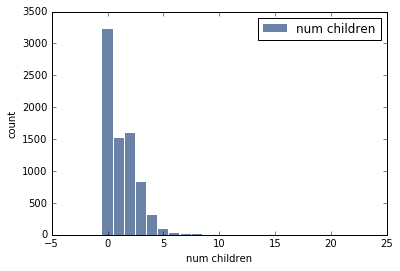

In [70]:
# Solution goes here
parity = resp['parity']

hist_parity = thinkstats2.Hist(parity, label='num children')
thinkplot.Hist(hist_parity)
thinkplot.Config(xlabel='num children', ylabel='count')

count_c = 0
count_none = 0
for i in parity:
    if i > 0:
        count_c += 1
    else:
        count_none += 1
print(count_c, count_none)

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [71]:
# Solution goes here
for num_child, freq in hist_parity.Largest(10):
    print(num_child, freq)

22 1
16 1
10 3
9 2
8 8
7 15
6 29
5 95
4 309
3 828


Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

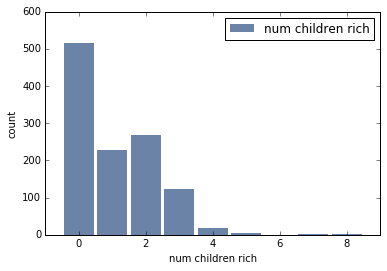

In [87]:
# Solution goes here# Solution goes here
parity_rich = parity[totincr==14]

hist_parity_rich = thinkstats2.Hist(parity_rich, label='num children rich')
thinkplot.Hist(hist_parity_rich)
thinkplot.Config(xlabel='num children rich', ylabel='count')

Find the largest parities for high income respondents.

In [73]:
# Solution goes here
hist_parity_rich.Largest(10)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [78]:
# Solution goes here
others = parity[totincr < 14]

p = parity_rich.mean()
o = others.mean()
print(p, o)

1.07586206897 1.24957581367


Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [79]:
# Solution goes here
CohenEffectSize(parity_rich, others)

-0.12511855314660367

In [83]:
type(parity_rich_hist)

NoneType

In [103]:
print(hist_parity_rich)
print(hist_parity_rich.__dict__['d'].values())

def get_mode_from_hist(hist):
    vals = hist.__dict__['d'].values()
    data = Counter(vals)
    return data.most_common(1)[0][1]

get_mode_from_hist(hist_parity_rich)

Hist({0: 515, 1: 229, 2: 267, 3: 123, 4: 19, 5: 5, 7: 1, 8: 1})
dict_values([515, 229, 267, 123, 19, 5, 1, 1])


2

There is no statistical significant difference in time when comparing first babies born and babies after that. When computing the Cohen d effect size, which is used to compare the difference between groups to the variability between groups, the difference is .028879. First births are longer by .078 weeks, which amounts to roughly 13 hours. A larger sample size would need to be used in order to flesh out this difference, but even then the difference is so small it would not be statistically significant.

For all births the mean pregnancy length is 38.6 weeks. The standard deviation is 2.7, so you can expect that estimation to vary 1 - 2 weeks on either side (before or after)